
**PLANT CLASSIFICATION AND DIAGNOSE DETECTION WITH DEEP LEARNING**


In this project, the leaves of the plants will be identified and their diseases will be determined by using the deep learning-based selected method.

1- DATASET CLEANING AND PREPARATION

2- MODEL TRAINING TO DEFINE PLANTS' LEAVES

3- LEAF IDENTIFICATION MODEL TEST

4- DETERMINING THE TYPE OF A SINGLE LEAF GIVEN TO THE MODEL

5- EDUCATION OF DISEASE IDENTIFICATION MODELS

6- TEST OF DISEASE IDENTIFICATION MODELS

7- DETERMINING THE TYPE OF A SINGLE LEAF GIVEN TO THE MODEL



+ Inclusion of Another Deep Learning Method in the Program

Google Drive Import
=============================

In this secion we import and mount Google Drive to access the dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd drive/MyDrive/bitirme

/content/drive/.shortcut-targets-by-id/1Z6YBRb4mrmupfNeWdQPmGLh-GlbSfxuY/bitirme


In [3]:
%matplotlib inline

In [4]:
#Unzip the downloaded file
#!unzip -q DB1.zip

Data Division
=============================

In this section we divide the dataset DB1 into train and test folders.

0.8 train size and 0.2 test size

In [ ]:
'''
# veriyi dagitma kodu
import os 
import random

from glob import glob 
from tqdm import tqdm 
for fruit in tqdm(os.listdir('DB2')):
  fruit_path = os.path.join('DB2', fruit )
  for fruit_class in glob(fruit_path+ '/*'):
    print(fruit_class)

    images = glob(fruit_class + '/*')
    random.shuffle(images)

    train_size = int(len(images) * 0.8)

    train = images[:train_size]
    test = images[train_size:]
    print(fruit_path)
    print(fruit_class)
    print(fruit_class.replace(fruit_path, f'{fruit_path}/train'))
    print('======')
    os.makedirs(fruit_class.replace(fruit_path, f'{fruit_path}/train'),exist_ok=True)
    os.makedirs(fruit_class.replace(fruit_path, f'{fruit_path}/test/'),exist_ok=True)
  
    [os.rename(i,i.replace(fruit+'/',f'{fruit}/test/')) for i in test]
    [os.rename(i,i.replace(fruit+'/',f'{fruit}/train/')) for i in train]
    #[os.rename(i,i.replace('DB1/','DB1/train/')) for i in train]
    


  0%|          | 0/4 [00:00<?, ?it/s]

DB2/Apple/Apple___Apple_scab
DB2/Apple
DB2/Apple/Apple___Apple_scab
DB2/Apple/train/Apple___Apple_scab
DB2/Apple/Apple___Black_rot
DB2/Apple
DB2/Apple/Apple___Black_rot
DB2/Apple/train/Apple___Black_rot
DB2/Apple/Apple___Cedar_apple_rust
DB2/Apple
DB2/Apple/Apple___Cedar_apple_rust
DB2/Apple/train/Apple___Cedar_apple_rust


 25%|██▌       | 1/4 [00:03<00:09,  3.07s/it]

DB2/Corn/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
DB2/Corn
DB2/Corn/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
DB2/Corn/train/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
DB2/Corn/Corn_(maize)___Common_rust_
DB2/Corn
DB2/Corn/Corn_(maize)___Common_rust_
DB2/Corn/train/Corn_(maize)___Common_rust_
DB2/Corn/Corn_(maize)___Northern_Leaf_Blight
DB2/Corn
DB2/Corn/Corn_(maize)___Northern_Leaf_Blight
DB2/Corn/train/Corn_(maize)___Northern_Leaf_Blight


 50%|█████     | 2/4 [00:07<00:07,  3.83s/it]

DB2/Grape/Grape___Black_rot
DB2/Grape
DB2/Grape/Grape___Black_rot
DB2/Grape/train/Grape___Black_rot
DB2/Grape/Grape___Esca_(Black_Measles)
DB2/Grape
DB2/Grape/Grape___Esca_(Black_Measles)
DB2/Grape/train/Grape___Esca_(Black_Measles)
DB2/Grape/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
DB2/Grape
DB2/Grape/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
DB2/Grape/train/Grape___Leaf_blight_(Isariopsis_Leaf_Spot)


 75%|███████▌  | 3/4 [00:09<00:02,  2.83s/it]

DB2/Tomato/Tomato___Septoria_leaf_spot
DB2/Tomato
DB2/Tomato/Tomato___Septoria_leaf_spot
DB2/Tomato/train/Tomato___Septoria_leaf_spot
DB2/Tomato/Tomato___Spider_mites Two-spotted_spider_mite
DB2/Tomato
DB2/Tomato/Tomato___Spider_mites Two-spotted_spider_mite
DB2/Tomato/train/Tomato___Spider_mites Two-spotted_spider_mite
DB2/Tomato/Tomato___Tomato_Yellow_Leaf_Curl_Virus
DB2/Tomato
DB2/Tomato/Tomato___Tomato_Yellow_Leaf_Curl_Virus
DB2/Tomato/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus


100%|██████████| 4/4 [00:15<00:00,  3.80s/it]


Second Section of the Project with ResNet
=================================================

In this section we have complished the second section of the project.

We trained a deep learning model with ResNet. After finding the type of the plant as unhealhy we can pass second part.

In this part, we have 4 seperate models for each plant type. After training each model we got accuracy and loss of models too.

In the sample usage of the model, it gets an unhealty plant photo and it sends this photo to the model of that plant. And finally, model returns the disease of this plant.

Import Necessary Libraries
--------------------------

In this section we import the necessary libraries

In [5]:
from __future__ import print_function 
from __future__ import division
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import pickle
print("PyTorch Version: ",torch.__version__)
print("Torchvision Version: ",torchvision.__version__)

PyTorch Version:  1.10.0+cu111
Torchvision Version:  0.11.1+cu111


**PLANT DISEASE DETECTION MODEL CREATE FUNCTION**
=================================================

In [8]:
def create_model(plant_name):
    #INPUTS************************************************************************************************************************************
    data_dir =  "./DB2/" + plant_name
    model_name = "resnet"
    num_classes = 3
    batch_size = 512
    num_epochs = 20
    feature_extract = True

    #HELPER FUNCTIONS**************************************************************************************************************************
    def set_parameter_requires_grad(model, feature_extracting):
       if feature_extracting:
           for param in model.parameters():
               param.requires_grad = False

    #INITIALIZE AND RESHAPE THE RESNET NETWORK************************************************************************************************
    def initialize_model(model_name, num_classes, feature_extract, use_pretrained=True):
       # Initialize these variables which will be set in this if statement. Each of these
        #   variables is model specific.
        model_ft = None
        input_size = 0

        if model_name == "resnet":
            """ Resnet18
            """
            model_ft = models.resnet18(pretrained=use_pretrained)
            set_parameter_requires_grad(model_ft, feature_extract)
            num_ftrs = model_ft.fc.in_features
            model_ft.fc = nn.Linear(num_ftrs, num_classes)
            input_size = 224       

        else:
            print("Invalid model name, exiting...")
            exit()
    
        return model_ft, input_size

    # Initialize the model for this run
    model_ft, input_size = initialize_model(model_name, num_classes, feature_extract, use_pretrained=True)

    # Print the model we just instantiated
    print(model_ft)

    #LOAD DATA********************************************************************************************************************************
    # Data augmentation and normalization for training
    # Just normalization for validation
    data_transforms = {
      'train': transforms.Compose([
          transforms.RandomResizedCrop(input_size),
          transforms.RandomHorizontalFlip(),
          transforms.ToTensor(),
          transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
      ]),
        'test': transforms.Compose([
            transforms.Resize(input_size),
          transforms.CenterCrop(input_size),
          transforms.ToTensor(),
          transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
    }

    print("Initializing Datasets and Dataloaders...")

    # Create training and validation datasets
    image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'test']}
    # Create training and validation dataloaders
    dataloaders_dict = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size, shuffle=True, num_workers=4) for x in ['train', 'test']}
    print('path', data_dir)

    import json
    id2lab= {i:class_name for i,class_name in enumerate(dataloaders_dict['train'].dataset.classes)}
    lab2id = {class_name : i for i , class_name  in id2lab.items()}
    print ("Classes:", id2lab)

    dataloaders_dict['train']


    # Detect if we have a GPU available
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    image_datasets


    #CREATE OPTIMIZER************************************************************************************************************************
    # Send the model to GPU
    model_ft = model_ft.to(device)

    # Gather the parameters to be optimized/updated in this run. If we are
    #  finetuning we will be updating all parameters. However, if we are 
    #  doing feature extract method, we will only update the parameters
    #  that we have just initialized, i.e. the parameters with requires_grad
    #  is True.
    params_to_update = model_ft.parameters()
    print("Params to learn:")
    if feature_extract:
       params_to_update = []
       for name,param in model_ft.named_parameters():
           if param.requires_grad == True:
              params_to_update.append(param)
              print("\t",name)
    else:
        for name,param in model_ft.named_parameters():
           if param.requires_grad == True:
                print("\t",name)

    # Observe that all parameters are being optimized
    optimizer_ft = optim.SGD(params_to_update, lr=0.001, momentum=0.9)


    #RUN TRAINING AND VALIDATION STEP
    print('Running Training and Validation')
    from sklearn.model_selection import KFold
    def train_model(model, dataloaders, criterion, optimizer, num_epochs=25):

        since = time.time()

        val_acc_history = []
        val_loss_history = []
        best_model_wts = copy.deepcopy(model.state_dict())
        best_acc = 0.0
        train_acc_history = [] 
        train_loss_history = [] 
        for epoch in range(num_epochs):
            print('Epoch {}/{}'.format(epoch+1, num_epochs))
            print('-' * 10)

            # Each epoch has a training and validation phase
            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()  # Set model to training mode
                else:
                    model.eval()   # Set model to evaluate mode

                running_loss = 0.0
                running_corrects = 0

                # Iterate over data.
                for inputs, labels in dataloaders[phase]:
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    # zero the parameter gradients
                    optimizer.zero_grad()

                    # forward
                    # track history if only in train
                    with torch.set_grad_enabled(phase == 'train'):
                        # Get model outputs and calculate loss

                        outputs = model(inputs)
                        loss = criterion(outputs, labels)
                        _, preds = torch.max(outputs, 1)

                        # backward + optimize only if in training phase
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()

                    # statistics
                    running_loss += loss.item() * inputs.size(0)
                    running_corrects += torch.sum(preds == labels.data)

                epoch_loss = running_loss / len(dataloaders[phase].dataset)
                # epoch_loss = epoch_loss.detach().cpu().numpy()
                epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)
                # epoch_acc = epoch_acc.detach().cpu().numpy()

                print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

                # deep copy the model
                if phase == 'val' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    best_model_wts = copy.deepcopy(model.state_dict())
                if phase == 'val':
                    val_acc_history.append(epoch_acc)
                    val_loss_history.append(epoch_loss)
                if phase == 'train':
                  train_acc_history.append(epoch_acc)
                  train_loss_history.append(epoch_loss)
            print()

        time_elapsed = time.time() - since
        print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
        print('Best val Acc: {:4f}'.format(best_acc))

        # load best model weights
        model.load_state_dict(best_model_wts)
        return model, val_acc_history , val_loss_history, train_acc_history, train_loss_history
    #*********************************************************************************************************
    # Setup the loss fxn
    criterion = nn.CrossEntropyLoss()

    # Train and evaluate
    from sklearn.model_selection import KFold
    n_fold = 5
    kfold=KFold(n_splits=n_fold,shuffle=True)



    initial_state = copy.deepcopy(model_ft.state_dict()) # Modelin ilk state


    average_loss = 0 
    best_loss = None
    model_folder = '/content/drive/MyDrive/bitirme/DB2_MODELS'
    saved_model = None

    for fold,(train_idx,val_idx) in enumerate(kfold.split(image_datasets['train'])):
      print()
      print('Fold {}/{}'.format(fold+1, n_fold))
      print('=' * 20)
      train_subsampler = torch.utils.data.SubsetRandomSampler(train_idx)
      val_subsampler = torch.utils.data.SubsetRandomSampler(val_idx)

      trainloader = torch.utils.data.DataLoader(
                          image_datasets['train'], 
                          batch_size=batch_size, sampler=train_subsampler)
      valloader = torch.utils.data.DataLoader(
                          image_datasets['train'],
                          batch_size=batch_size, sampler=val_subsampler)
      model_ft.load_state_dict(initial_state)

      model_ft, val_acc_history , val_loss_history,train_acc_history,train_loss_history = train_model(model_ft,{'train' : trainloader , 'val' :valloader } , criterion, optimizer_ft, num_epochs=num_epochs)
      fold_loss = np.average(val_loss_history)
      average_loss += fold_loss
      if best_loss== None or fold_loss < best_loss:
        best_loss = fold_loss
        saved_model= copy.deepcopy(model_ft.state_dict())
      
      
    print()
    print('Average Loss = ', average_loss / n_fold )
    print()
    #torch.save(saved_model.state_dict(), 'saved_model' + model_name)

    #SAVING MODEL
    directory=model_name + plant_name
    path=os.path.join(model_folder, directory)
    os.makedirs(path , exist_ok=True)
    torch.save(saved_model, os.path.join(path , 'pytorch_model.bin'))
    import pickle 
    with open(os.path.join(path , 'labels.pkl') , 'wb') as fp :
      pickle.dump([id2lab,lab2id] , fp)
    print()
    print('Model is saved:', directory)
    print('=' * 20)
    print()
    

    #VALIDATION AND TRAIN PLOTS
    #TRAIN LOSS
    plt.figure(figsize=(10,5))
    plt.title("Train Loss")
    plt.plot(train_loss_history,label="Train")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    #TRAIN ACC
    plt.figure(figsize=(10,5))
    plt.title("Train Acc")
    plt.plot(train_acc_history,label="Train")
    plt.xlabel("Epochs")
    plt.ylabel("Acc")
    plt.legend()
    plt.show()
    #VAL LOSS
    plt.figure(figsize=(10,5))
    plt.title("Validation Loss")
    plt.plot(val_loss_history,label="Val")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    #VAL ACC
    plt.figure(figsize=(10,5))
    plt.title("Validation Acc")
    plt.plot(val_acc_history,label="Val")
    plt.xlabel("Epochs")
    plt.ylabel("Acc")
    plt.legend()
    plt.show()



    ##TESTING STEP
    model_folder = '/content/drive/MyDrive/bitirme/DB2_MODELS/' + model_name + plant_name
    model_ft.load_state_dict(torch.load(os.path.join(model_folder , 'pytorch_model.bin')))
    print('Model has been loaded')
    print('<All keys matched successfully>')
    with open(os.path.join(model_folder , 'labels.pkl') , 'rb') as fp :
      id2lab,lab2id = pickle.load(fp)
    
    model_ft.eval()

    since = time.time()
    val_acc_history = []
    val_loss_history = []
    best_acc = 0.0


    running_loss = 0.0
    running_corrects = 0

    # Iterate over data.
    for inputs, labels in dataloaders_dict['test']:
        inputs = inputs.to(device)
        labels = labels.to(device)
        # track history if only in train
        with torch.set_grad_enabled(False):
            outputs = model_ft(inputs)
            _, preds = torch.max(outputs, 1)
        running_corrects += torch.sum(preds == labels.data)
    running_corrects
    len(dataloaders_dict['test'])
    result=running_corrects / len( dataloaders_dict['test'])
    print('Result', result)

**APPLE DISEASE DETECTION MODEL**
=================================================

This dataset contains 3 classes of apple diseases:
1. Apple___Apple_scab
2. Apple___Black_rot
3. Apple___Cedar_apple_rust

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


path ./DB2/Apple
Classes: {0: 'Apple___Apple_scab', 1: 'Apple___Black_rot', 2: 'Apple___Cedar_apple_rust'}
Params to learn:
	 fc.weight
	 fc.bias
Running Training and Validation

Fold 1/5
Epoch 1/30
----------
train Loss: 0.8893 Acc: 0.2848
val Loss: 0.2128 Acc: 0.0773

Epoch 2/30
----------
train Loss: 0.8855 Acc: 0.3121
val Loss: 0.2047 Acc: 0.0955

Epoch 3/30
----------
train Loss: 0.8690 Acc: 0.3106
val Loss: 0.1955 Acc: 0.1167

Epoch 4/30
----------
train Loss: 0.8607 Acc: 0.3545
val Loss: 0.1894 Acc: 0.1182

Epoch 5/30
----------
train Loss: 0.8524 Acc: 0.3712
val Loss: 0.1851 Acc: 0.1242

Epoch 6/30
----------
train Loss: 0.7977 Acc: 0.4182
val Loss: 0.1778 Acc: 0.1288

Epoch 7/30
----------
train Loss: 0.7533 Acc: 0.4621
val Loss: 0.1876 Acc: 0.1091

Epoch 8/30
----------
train Loss: 0.7355 Acc: 0.4303
val Loss: 0.1855 Acc: 0.0985

Epoch 9/30
----------
train Loss: 0.7244 Acc: 0.4273
val Loss: 0.1689 Acc: 0.1242

Epoch 10/30
----------
train Loss: 0.6767 Acc: 0.5030
val Loss: 0

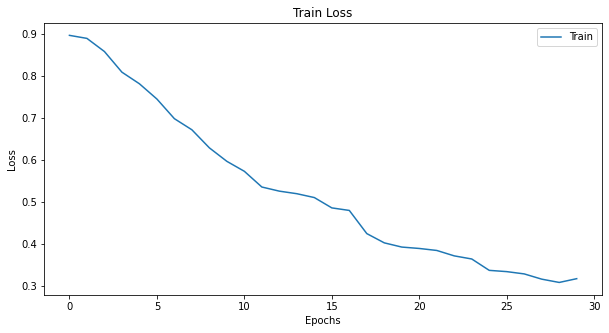

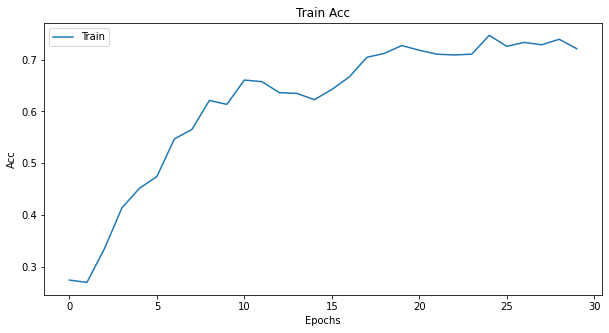

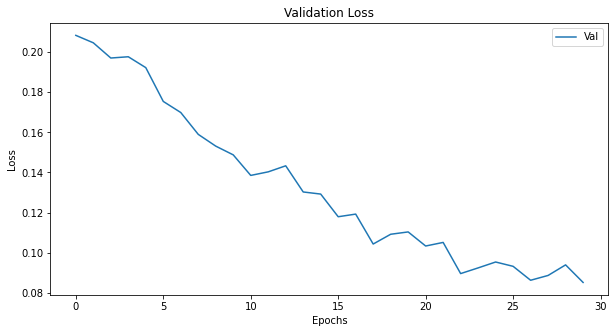

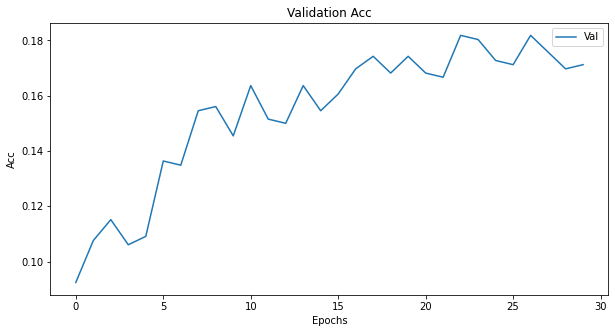

Model has been loaded
<All keys matched successfully>


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Result tensor(155., device='cuda:0')


In [7]:
model_ft=create_model('Apple')

**CORN(MAIZE) DISEASE DETECTION MODEL**
=================================================

This dataset contains 3 classes of corn diseases:
1. Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
2. Corn_(maize)___Common_rust_
3. Corn_(maize)___Northern_Leaf_Blight

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


train Loss: 0.8593 Acc: 0.3301
val Loss: 0.2228 Acc: 0.0744

Epoch 2/30
----------
train Loss: 0.8399 Acc: 0.3387
val Loss: 0.2170 Acc: 0.0755

Epoch 3/30
----------
train Loss: 0.8312 Acc: 0.3528
val Loss: 0.2082 Acc: 0.0906

Epoch 4/30
----------
train Loss: 0.7956 Acc: 0.4035
val Loss: 0.2067 Acc: 0.0982

Epoch 5/30
----------
train Loss: 0.7703 Acc: 0.4261
val Loss: 0.1953 Acc: 0.1079

Epoch 6/30
----------
train Loss: 0.7441 Acc: 0.4585
val Loss: 0.1879 Acc: 0.1176

Epoch 7/30
----------
train Loss: 0.7099 Acc: 0.4962
val Loss: 0.1779 Acc: 0.1284

Epoch 8/30
----------
train Loss: 0.6858 Acc: 0.5070
val Loss: 0.1717 Acc: 0.1284

Epoch 9/30
----------
train Loss: 0.6492 Acc: 0.5491
val Loss: 0.1616 Acc: 0.1413

Epoch 10/30
----------
train Loss: 0.6306 Acc: 0.5588
val Loss: 0.1560 Acc: 0.1499

Epoch 11/30
----------
train Loss: 0.6107 Acc: 0.5599
val Loss: 0.1536 Acc: 0.1338

Epoch 12/30
----------
train Loss: 0.5960 Acc: 0.5901
val Loss: 0.1557 Acc: 0.1402

Epoch 13/30
----------


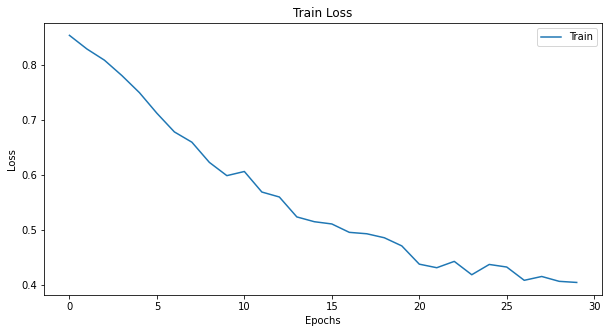

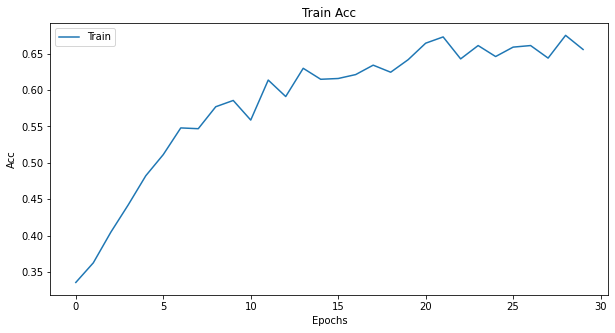

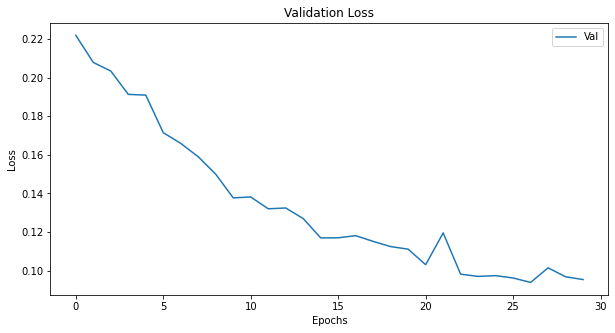

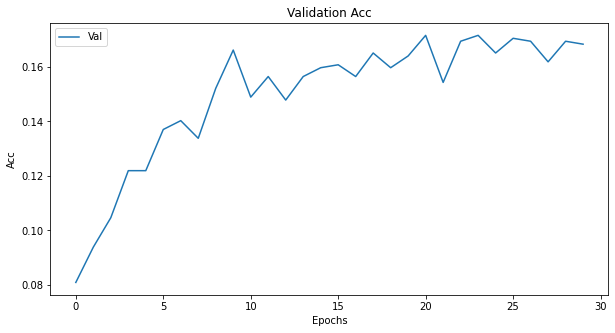

Model has been loaded
<All keys matched successfully>
Result tensor(198., device='cuda:0')


In [ ]:
model_ft=create_model('Corn')

**GRAPE DISEASE DETECTION MODEL**
=================================================

This dataset contains 3 classes of grape diseases:
1. Grape___Black_rot
2. Grape___Esca_(Black_Measles)
3. Grape___Leaf_blight_(Isariopsis_Leaf_Spot)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


path ./DB2/Grape
Classes: {0: 'Grape___Black_rot', 1: 'Grape___Esca_(Black_Measles)', 2: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)'}
Params to learn:
	 fc.weight
	 fc.bias
Running Training and Validation

Fold 1/5
Epoch 1/20
----------
train Loss: 0.9425 Acc: 0.2857
val Loss: 0.2502 Acc: 0.0714

Epoch 2/20
----------
train Loss: 0.9344 Acc: 0.2530
val Loss: 0.2482 Acc: 0.0655

Epoch 3/20
----------
train Loss: 0.9163 Acc: 0.3006
val Loss: 0.2378 Acc: 0.0685

Epoch 4/20
----------
train Loss: 0.9059 Acc: 0.2976
val Loss: 0.2323 Acc: 0.0774

Epoch 5/20
----------
train Loss: 0.8812 Acc: 0.3363
val Loss: 0.2309 Acc: 0.0685

Epoch 6/20
----------
train Loss: 0.8791 Acc: 0.3036
val Loss: 0.2305 Acc: 0.0625

Epoch 7/20
----------
train Loss: 0.8820 Acc: 0.3304
val Loss: 0.2155 Acc: 0.1042

Epoch 8/20
----------
train Loss: 0.8454 Acc: 0.3304
val Loss: 0.2212 Acc: 0.0863

Epoch 9/20
----------
train Loss: 0.8116 Acc: 0.3780
val Loss: 0.2013 Acc: 0.1101

Epoch 10/20
----------
train Loss: 0.

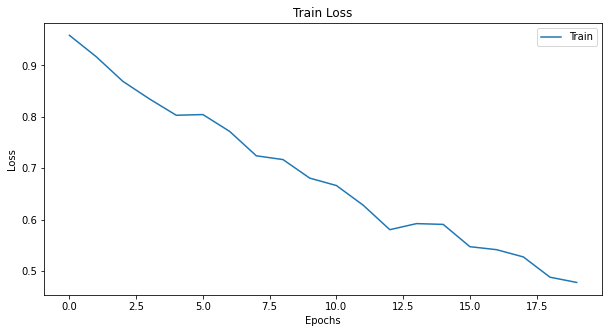

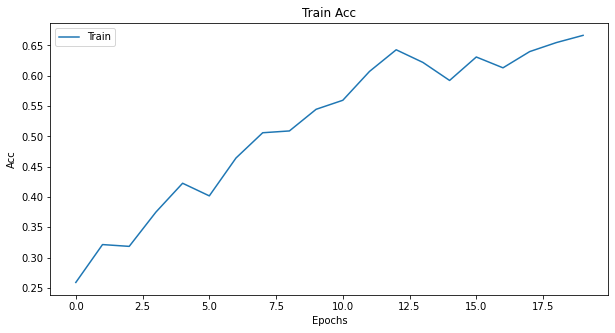

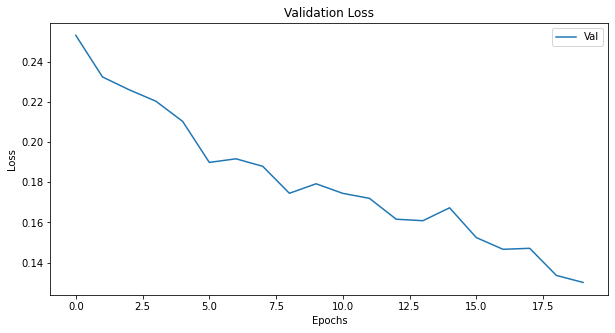

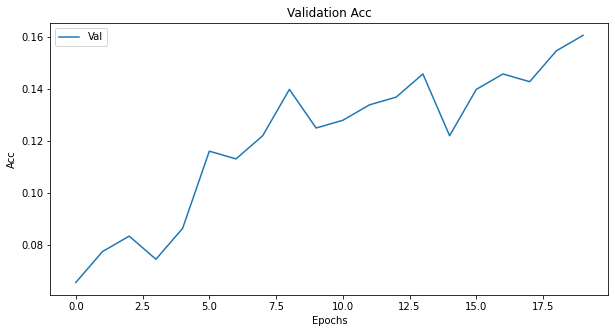

Model has been loaded
<All keys matched successfully>
Result tensor(77., device='cuda:0')


In [9]:
model_ft=create_model('Grape')

**TOMATO DISEASE DETECTION MODEL**
=================================================

This dataset contains 3 classes of grape diseases:
1. Tomato___Septoria_leaf_spot
2. Tomato___Spider_mites Two-spotted_spider_mite
3. Tomato___Tomato_Yellow_Leaf_Curl_Virus

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


train Loss: 0.9053 Acc: 0.2830
val Loss: 0.2388 Acc: 0.0582

Epoch 2/30
----------
train Loss: 0.8961 Acc: 0.2846
val Loss: 0.2302 Acc: 0.0715

Epoch 3/30
----------
train Loss: 0.8688 Acc: 0.3074
val Loss: 0.2219 Acc: 0.0778

Epoch 4/30
----------
train Loss: 0.8304 Acc: 0.3656
val Loss: 0.2133 Acc: 0.0920

Epoch 5/30
----------
train Loss: 0.7705 Acc: 0.4426
val Loss: 0.1955 Acc: 0.1069

Epoch 6/30
----------
train Loss: 0.7282 Acc: 0.5024
val Loss: 0.1836 Acc: 0.1266

Epoch 7/30
----------
train Loss: 0.6871 Acc: 0.5637
val Loss: 0.1649 Acc: 0.1470

Epoch 8/30
----------
train Loss: 0.6390 Acc: 0.5967
val Loss: 0.1576 Acc: 0.1564

Epoch 9/30
----------
train Loss: 0.5986 Acc: 0.6392
val Loss: 0.1518 Acc: 0.1572

Epoch 10/30
----------
train Loss: 0.5476 Acc: 0.6714
val Loss: 0.1343 Acc: 0.1698

Epoch 11/30
----------
train Loss: 0.5226 Acc: 0.6730
val Loss: 0.1232 Acc: 0.1745

Epoch 12/30
----------
train Loss: 0.4914 Acc: 0.6832
val Loss: 0.1250 Acc: 0.1722

Epoch 13/30
----------


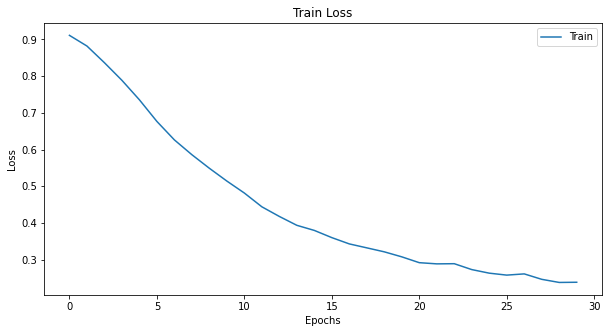

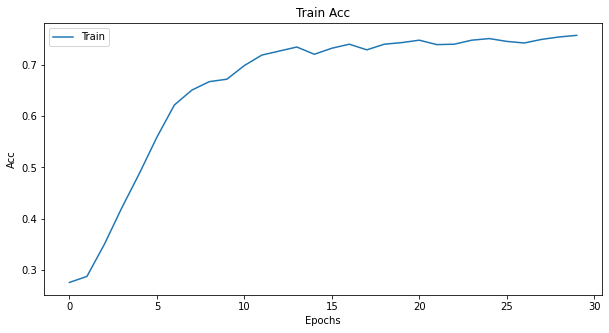

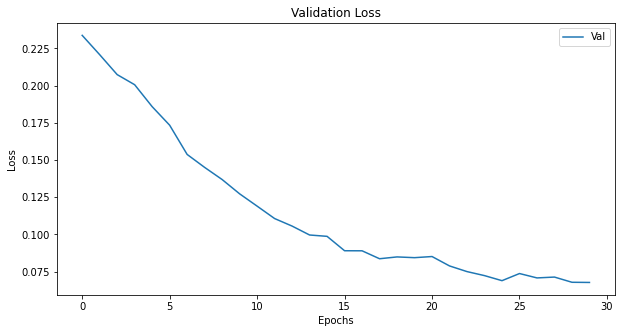

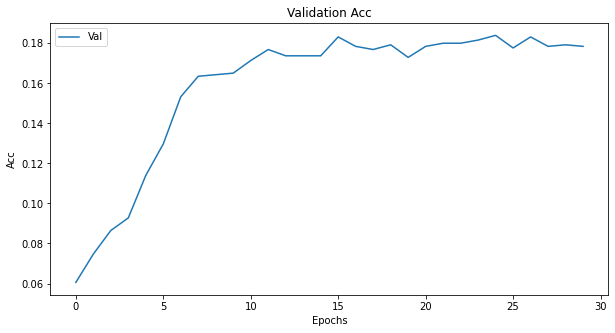

Model has been loaded
<All keys matched successfully>
Result tensor(305., device='cuda:0')


In [ ]:
model_ft=create_model('Tomato')